In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [29]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [30]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

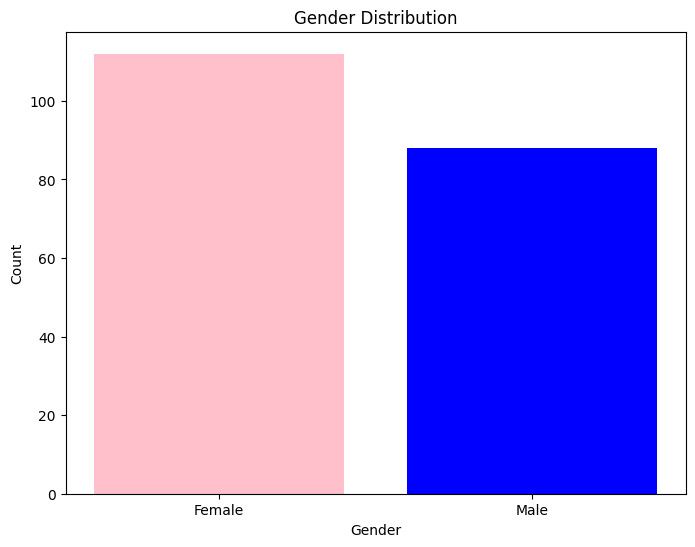

In [31]:
#to check gender distribution
df = pd.DataFrame(dataset)

gender_counts = df['Genre'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


In [32]:
# Select the features for clustering
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

In [33]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

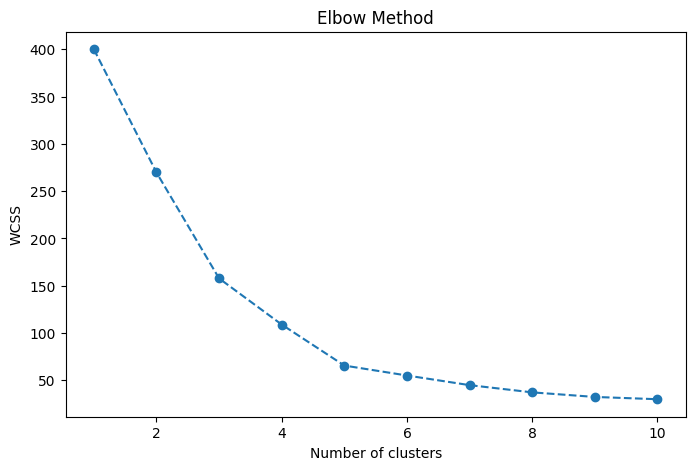

In [52]:
# To find the optimal number of clusters using the Elbow Method
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


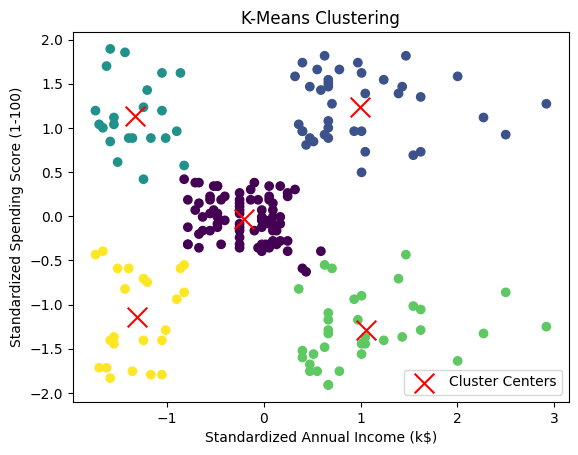

Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [53]:
#k mean clustering
optimal_num_clusters = 5 #I choosed based on the elbow graph results

# kmean clustering
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
dataset['Cluster'] = cluster_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Standardized Annual Income (k$)')
plt.ylabel('Standardized Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# To Print the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))


In [54]:
# Explore the clustered data
clustered_data = dataset[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
print(clustered_data.head(-10))


     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                  15                      39        4
1             2                  15                      81        2
2             3                  16                       6        4
3             4                  16                      77        2
4             5                  17                      40        4
..          ...                 ...                     ...      ...
185         186                  99                      97        1
186         187                 101                      24        3
187         188                 101                      68        1
188         189                 103                      17        3
189         190                 103                      85        1

[190 rows x 4 columns]


In [57]:
#Silhouette 

# Calculating the Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.553931997444648


In [59]:
#Davies-Bouldin

# Calculating the Davies-Bouldin Index
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davides-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.5725628995597082
